In [293]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

# Домашнее задание №1: линейная регрессия и векторное дифференцирование (10 баллов).

* Некоторые задания будут по вариантам (всего 4 варианта). Чтобы выяснить свой вариант, посчитайте количество букв в своей фамилии, возьмите остаток от деления на 4 и прибавьте 1.

Есаян = 5 букв

5 % 4 + 1 = 2 вариант

In [294]:
import numpy as np

## Многомерная линейная регрессия из sklearn

Применим многомерную регрессию из sklearn для стандартного датасета

In [295]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 10000)
print(X.shape, y.shape)

(10000, 100) (10000,)


У нас 10000 объектов и 100 признаков. Для начала решим задачу аналитически "из коробки".

In [296]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_

1.3947402571022364e-25


array([ 2.35131177e-14,  5.68434189e-14, -7.10542736e-15,  6.56591813e+00,
       -5.32907052e-15,  7.81597009e-14,  1.73194792e-14, -3.55271368e-15,
       -6.39488462e-14,  2.37587727e-14,  1.64155379e+01,  1.77761650e+01,
       -1.95399252e-14,  3.55271368e-15, -3.19744231e-14, -1.10134124e-13,
        1.73194792e-14, -1.77635684e-15,  8.43769499e-15,  5.95079541e-14,
        1.59872116e-14, -9.68114477e-14, -2.08721929e-14, -2.66453526e-14,
        2.05391260e-14, -4.52970994e-14, -7.10542736e-15, -4.17443857e-14,
       -5.06261699e-14,  1.77635684e-15, -3.10862447e-15,  1.42108547e-14,
       -2.30926389e-14, -2.30926389e-14,  2.57571742e-14,  7.99360578e-15,
        9.99200722e-15, -7.54951657e-15,  9.76996262e-15, -1.52100554e-14,
        3.59712260e-14,  2.30926389e-14,  3.37507799e-14, -4.57411886e-14,
       -4.44089210e-14,  6.21724894e-14,  1.19904087e-14, -1.42108547e-14,
        1.77635684e-14,  9.73606083e+01, -1.59872116e-14,  9.36343986e+01,
        2.08721929e-14, -

Теперь попробуем обучить линейную регрессию методом градиентного спуска "из коробки"

In [303]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.0000001).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))
reg.coef_

3.082105740111725e-10


array([-3.68402357e-07, -1.13535010e-07,  1.86935665e-07,  6.56591700e+00,
       -4.38334170e-07,  3.76401407e-07,  1.25000937e-07,  3.39338755e-07,
        4.87525702e-07,  1.19336974e-07,  1.64155365e+01,  1.77761632e+01,
       -9.50190521e-08, -2.64870092e-07,  3.58796212e-07,  1.17983819e-07,
       -1.53832446e-08,  5.07897595e-08, -2.04123860e-07,  4.10059282e-07,
        3.51692791e-07, -4.24776892e-07, -3.85013047e-07, -6.81069704e-07,
        6.32062628e-07,  2.83269459e-07, -2.56108139e-07,  5.71618280e-07,
       -3.02694060e-07, -2.18085642e-07,  6.38258940e-07,  3.82163421e-07,
        3.20326696e-07, -2.35140919e-07, -3.61159682e-07,  3.07989613e-07,
       -4.86825399e-07,  3.16703831e-07, -3.12232998e-08, -1.66093067e-07,
       -3.39979814e-07,  7.39551108e-08,  3.75967227e-07,  2.87431921e-07,
        3.07528916e-07, -8.15395308e-07, -3.39825983e-07, -3.06102669e-07,
       -4.03523761e-07,  9.73605986e+01, -6.60015206e-07,  9.36343897e+01,
        1.99211576e-07,  

***Задание 1 (0.5 балла).*** Объясните, чем вызвано различие двух полученных значений метрики?

***Ответ:*** в sklearn имплементации линейной регрессии получили MSE в 10^15 раз меньше, чем в SGDRegressor. В SGDRegressor используется L1-регуляризация, не позволяющая слишком идеально обучить модель на искуственных данных (так как регуляризация используется как-раз таки для того, чтобы не переобучить модель), а в sklearn LinearRegression() регуляризации нет.

***Задание 2 (0.5 балла).*** Подберите гиперпараметры в методе градиентного спуска так, чтобы значение MSE было близко к значению MSE, полученному при обучении LinearRegression.

***Ответ:*** при alpha=0 или очень-очень близком к нулю получим одинаковые MSE (см. ниже)

In [304]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(alpha=0.000000).fit(X, y)
print(mean_squared_error(y, reg.predict(X)))

5.3463399809659515e-25


Получили MSE = 5.3463399809659515e-25 vs MSE = 1.3947402571022364e-25 -- более близкие значения

## Ваша многомерная линейная регрессия

***Задание 3 (4 балла)***. Напишите собственную многомерную линейную регрессию, оптимизирующую MSE методом *градиентного спуска*. Для этого используйте шаблонный класс. 

Критерий останова: либо норма разности весов на текущей и предыдущей итерациях меньше определенного значения (первый и третий варианты), либо модуль разности функционалов качества (MSE) на текущей и предыдущей итерациях меньше определенного значения (второй и четвертый варианты). Также предлагается завершать обучение в любом случае, если было произведено слишком много итераций.

***Задание 4 (2 балла)***. Добавьте l1 (первый и второй варианты) или l2 (третий и четвертый варианты) регуляризацию. 

In [306]:
class LinearRegression(object):
    def __init__(self, alpha=0.0001, l_ratio=0.001, tol=0.001, max_iter=1000):
        '''
        Для начала необходимо инициализировать параметры
        alpha - это learning rate или шаг обучения
        l_ratio - параметр регуляризации
        tol - значение для критерия останова
        max_iter - максимальное количество итераций обучения
        '''
        self.alpha_ = alpha
        self.l_ratio_ = l_ratio
        self.tol_ = tol
        self.max_iter_ = max_iter
             
    def fit(self, X, y):
        '''
        Метод для обучения линейной регрессии
        X - матрица признаков
        y - вектор правильных ответов
        '''
        self.costs_ = []
        self.coef_ = np.zeros((X.shape[1], ))
        m = X.shape[0]
        i = 0
        while i <= self.max_iter_:
            y_pred = np.dot(X, self.coef_)
            residual = y_pred - y
            gradient_vector = 2 * np.dot(X.T, residual) + self.l_ratio_ * np.sign(self.coef_)
            self.coef_ -= (self.alpha_ / m) * gradient_vector
            cost = np.sum(residual ** 2) / m
            self.costs_.append(cost)
            
            if i > 1 and abs(self.costs_[i] - self.costs_[i - 1]) < self.tol_:
                break
            else:
                i += 1
        return self
        
   
    def predict(self, X):
        '''
        Метод для предсказаний линейной регрессии
        X - матрица признаков
        '''
        
        return np.dot(X, self.coef_)

In [290]:
my_reg = LinearRegression(alpha = 0.1, tol = 0.0001, l_ratio = 0.01)
my_reg.fit(X, y)

assert mean_squared_error(y, my_reg.predict(X)) < 1e-3
print('You are amazing! Great work!')

You are amazing! Great work!


In [291]:
mean_squared_error(y, my_reg.predict(X))

0.0001230608151993754

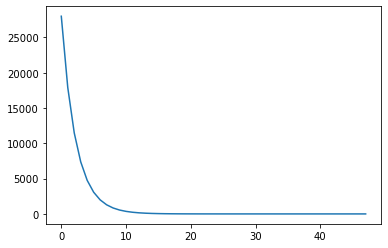

In [260]:
import matplotlib.pyplot as plt
plt.plot(my_reg.costs_)

***Задание 5 (1 балл)***. Обучите линейную регрессию из коробки

* с l1-регуляризацией (from sklearn.linear_model import Lasso, **первый и второй вариант**) или с l2-регуляризацией (from sklearn.linear_model import Ridge, **третий и четвертый вариант**)
* со значением параметра регуляризации **0.1 - для первого и третьего варианта, 0.01 - для второго и четвертого варианта**. 

Обучите вашу линейную регрессию с тем же значением параметра регуляризации и сравните результаты. Сделайте выводы.

In [263]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X, y)

lasso_reg.predict(X)
mean_squared_error(y, lasso_reg.predict(X))

0.0010130280293980426

Увеличив параметр регуляризации, увеличивается MSE (позволяем модели не переобучаться на обучающихся данных)

***Задание 6 (1 балл).***
Пусть $P, Q \in \mathbb{R}^{n\times n}$. Найдите $\nabla_Q tr(PQ)$

Пусть $P = (p_{ij}), Q = (q_{ij})$. Втупую посчитаем $tr(PQ) = \sum_i^n \sum_j^n p_{ij}q_{ji}$.

Частная производная $\frac{\delta tr(PQ)}{\delta q_{ij}} = p_{ji}$.

В результате получим, что $\nabla_Q tr(PQ) = P^T$

***Задание 7 (1 балл).***
Пусть $x, y \in \mathbb{R}^{n}, M \in \mathbb{R}^{n\times n}$. Найдите $\nabla_M x^T M y$

Посчитаем $\nabla_M x^T M y$

Считаем втупую: $\nabla_M x^T M y = \sum_i^n \sum_j^n y_i m_{ij} x_j$


Частная производная $\frac{\delta \nabla_M x^T M y}{\delta m_{ij}} = y_i x_j$.

Значит, $\nabla_M x^T M y = xy^T$


Решения заданий 6 и 7 можно написать на листочке и отправить в anytask вместе с заполненным ноутбуком.